<a href="https://colab.research.google.com/github/malet-ds/GlobalAIHubDLCourse/blob/main/project/Project_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Image Classification

Hola !

Objective of this project is to implement the following models for the CIFAR100 image classification dataset.

### Importing packages 

In [1]:
# Import neccessary packages here
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')

### Load data

In [2]:
# image data
img_rows, img_cols, channels = 32, 32, 3
num_classes = 20

# Read images using built-in functions 
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='coarse')

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], channels, img_rows, img_cols)
    input_shape = (channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
    input_shape = (img_rows, img_cols, channels)

# Perform preprocessing (if any)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a validation set
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

x_train shape: (40000, 32, 32, 3)
40000 train samples
10000 validation samples
10000 test samples


###  Training parameters

In [3]:
# Mention the training parameters such as epochs, learning rate, number of samples etc.
batch_size = 32
epochs = 10


## Training CNN for CIFAR100

In [4]:
# Design the model architecture here
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='valid', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

### Compile

In [5]:
# Compile the model architecture here
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


### Training

In [6]:
# Train the transfer learning model here   // NOTE: I am not doing transfer learning here.
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))


Epoch 1/10
1250/1250 [==============================] - 56s 44ms/step - loss: 2.8323 - accuracy: 0.1176 - val_loss: 2.3435 - val_accuracy: 0.2935
Epoch 2/10
1250/1250 [==============================] - 53s 43ms/step - loss: 2.4507 - accuracy: 0.2404 - val_loss: 2.1524 - val_accuracy: 0.3410
Epoch 3/10
1250/1250 [==============================] - 54s 43ms/step - loss: 2.3270 - accuracy: 0.2784 - val_loss: 2.0844 - val_accuracy: 0.3699
Epoch 4/10
1250/1250 [==============================] - 55s 44ms/step - loss: 2.2589 - accuracy: 0.3011 - val_loss: 2.0227 - val_accuracy: 0.3866
Epoch 5/10
1250/1250 [==============================] - 53s 42ms/step - loss: 2.1920 - accuracy: 0.3188 - val_loss: 1.9713 - val_accuracy: 0.3986
Epoch 6/10
1250/1250 [==============================] - 52s 42ms/step - loss: 2.1472 - accuracy: 0.3311 - val_loss: 1.9413 - val_accuracy: 0.4037
Epoch 7/10
1250/1250 [==============================] - 57s 45ms/step - loss: 2.1174 - accuracy: 0.3398 - val_loss: 1.9093 -

### Testing

In [7]:
# Test the transfer learning model with testing set      //   NOTE: I am not doing transfer learning here
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 1.865654468536377
Test accuracy: 0.42309999465942383


In [8]:
# Predict a few individual images

# this order of labels assumes that the documentation keeps the same order than the dataset
labels = ['aquatic mammals','fish','flowers','food','fruit and vegetables','household electrical devices','household furniture','insects',
          'large carnivores','large man-made outdoor things','large natural outdoor scenes','large omnivores and herbivores','medium-sized mammals',
          'non-insect invertebrates','people','reptiles','small mammals','trees','vehicles 1','vehicles 2']

print('PREDICTED CLASS \t\t\t ACTUAL CLASS')
for i in range(10):
    data = x_test[i,:,:,:]
    data = data.reshape(1,data.shape[0],data.shape[1],data.shape[2])
    prediction = model.predict(data)
    predicted_class = np.where(prediction[0] == np.max(prediction[0]))[0][0]
    actual_class = np.where(y_test[i]==1)[0][0]
    print('{:39}  {}'.format(labels[predicted_class],labels[actual_class]))

PREDICTED CLASS 			 ACTUAL CLASS
large man-made outdoor things            large natural outdoor scenes
small mammals                            large natural outdoor scenes
aquatic mammals                          aquatic mammals
vehicles 1                               fruit and vegetables
large natural outdoor scenes             large natural outdoor scenes
large carnivores                         flowers
large carnivores                         large omnivores and herbivores
large carnivores                         insects
large natural outdoor scenes             large natural outdoor scenes
fruit and vegetables                     fruit and vegetables


### Save

In [9]:
# Save the model to disk

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


### Inference

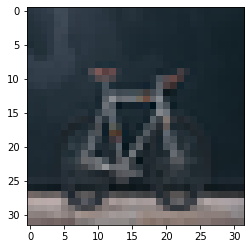

Predicted Class:  aquatic mammals


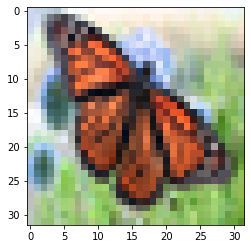

Predicted Class:  insects


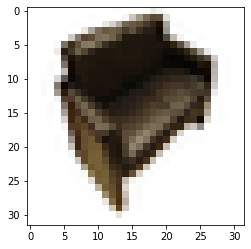

Predicted Class:  small mammals


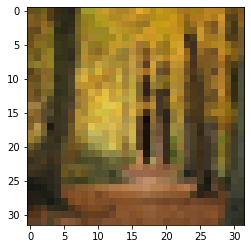

Predicted Class:  fruit and vegetables


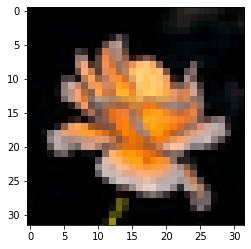

Predicted Class:  flowers


In [14]:
# Download random fashion images from internet and process them to give as input to the model   
#### NOTE: I did not train using the fashion dataset, so I downloaded images consistent with the dataset used for training
## I downloaded 5 images and resized them to be 32x32
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
from matplotlib import image

im_size = 32

images = ['pictures/bicycle.jpg','pictures/butterfly.jpg','pictures/couch.jpg','pictures/forest.jpg','pictures/rose.jpg'] 

for img in images:
    image = Image.open(img)
    image = image.resize((im_size,im_size), Image.ANTIALIAS)
    data = asarray(image)    
    plt.imshow(data/255)
    plt.show()
    # Perform preprocessing
    data = data.reshape(1,data.shape[0],data.shape[1],data.shape[2])
    data = data.astype('float32')
    data /= 255
    # Predict label of the downloaded images using trained model
    prediction = model.predict(data)
    predicted_class = np.where(prediction[0] == np.max(prediction[0]))[0][0]
    #print('Prediction Scores: \n', prediction[0])
    print('Predicted Class: ', labels[predicted_class])


### CONCLUSION: NOT THE BEST CLASSIFIER I HAVE SEEN

## USING A PRE-TRAINED MODEL

In [15]:
# loading the vgg16 model
from keras.applications.vgg16 import VGG16

model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

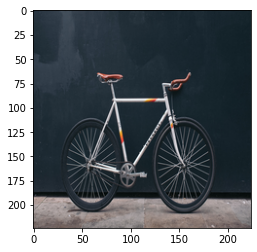

('n02835271', 'bicycle-built-for-two', 0.24156842)


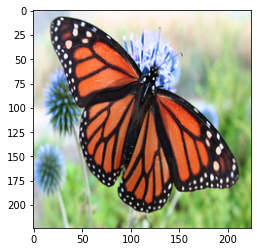

('n02279972', 'monarch', 0.9999449)


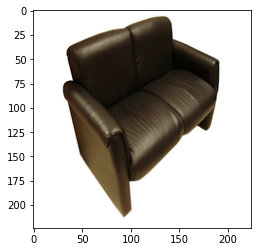

('n02791124', 'barber_chair', 0.6236955)


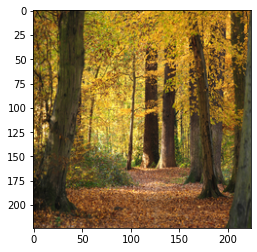

('n03743016', 'megalith', 0.34769484)


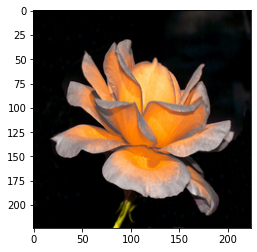

('n12985857', 'coral_fungus', 0.24847731)


In [16]:
# prepare images and perform predictions
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
from matplotlib import image

im_size = 224

images = ['pictures/bicycle.jpg','pictures/butterfly.jpg','pictures/couch.jpg','pictures/forest.jpg','pictures/rose.jpg'] 

for img in images:
    image = Image.open(img)
    image = image.resize((im_size,im_size), Image.ANTIALIAS)
    data = asarray(image)    
    plt.imshow(data/255)
    plt.show()
    # Perform preprocessing
    image = asarray(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    # Predict label of the downloaded images using trained model
    pred = model.predict(image)
    label = decode_predictions(pred)
    label = label[0][0]
    print(label)



### MUCH BETTER, THOUGH NOT SO GREAT

## RETRAIN THE CLASSIFIER PART OF THE MODEL USING SAME STRUCTURE

In [17]:
from keras.models import Model
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(32, 32, 3))
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [19]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='coarse')

im_size = 32
num_classes = 20

# Perform preprocessing
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape, x_test.shape)
print(y_train.shape,y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 20) (10000, 20)


In [20]:
batch_size=64
epochs=10

# Compile the model architecture here
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
'''
# Train the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
'''

'\n# Train the model\nmodel.fit(x_train, y_train,\n          batch_size=batch_size,\n          epochs=epochs,\n          verbose=1)\n'

## USING ARCHITECTURE FOUND IN PAPER